In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

In [2]:
!pip install tweepy

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [3]:
!pip install textblob


notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [10]:
import tweepy

In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prathik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prathik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
from textblob import TextBlob

In [3]:
w=TextBlob('Prithvi is a thin guy and his life revolves on Sarcasm')

In [4]:
w

TextBlob("Prithvi is a thin guy and his life revolves on Sarcasm")

In [11]:
w.tags

[('Prithvi', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('thin', 'JJ'),
 ('guy', 'NN'),
 ('and', 'CC'),
 ('his', 'PRP$'),
 ('life', 'NN'),
 ('revolves', 'NNS'),
 ('on', 'IN'),
 ('Sarcasm', 'NNP')]

In [5]:
w.words

WordList(['Prithvi', 'is', 'a', 'thin', 'guy', 'and', 'his', 'life', 'revolves', 'on', 'Sarcasm'])

In [6]:
w.sentiment.polarity

-0.4

In [7]:
consumer_key= 'uScSMZyGyKLL1QS0IZn6LwhmR'
consumer_secret= 'NFnSxuL0tP2NR13Iw8bIMoWDDW5sgUWHDyTYKtvqimtfBI7QDl'

In [8]:
access_token='93947520-tMImwLjyqYj0wrkwjszxCoZIVmIZao0ZA6kmwCWl8'
access_token_secret='ClvWkfVPG4AxMRU6btSNLEOI3AmCpbQwQCmdsqPO5bfUZ'

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [12]:
auth.set_access_token(access_token, access_token_secret)

In [13]:
api = tweepy.API(auth)

In [14]:
sachin_tweets=api.search('Sachin Tendulkar')

In [15]:
l=[]
for tweets in sachin_tweets:
    a=TextBlob(tweets.text)
    l.append(a.polarity)

In [16]:
np.mean(l)
#Indicating positive sentiment when Sachin Tendulkar is mentioned in tweets

0.24166666666666667

In [119]:
chester_tweets=api.search('Chester Bennington')

In [120]:
l2=[]
for tweets in chester_tweets:
    a=TextBlob(tweets.text)
    l2.append(a.polarity)

In [121]:
np.mean(l2)
#Indicating negative sentiment due to recent death of Chester Bennington

-0.045075757575757575

In [111]:
a_tweets=api.search('Avicii')

In [112]:
l3=[]
for tweets in a_tweets:
    a=TextBlob(tweets.text)
    l3.append(a.polarity)

In [113]:
np.mean(l3)
#Indicating negative sentiment due to recent death of Avicii

-0.002901234567901234

In [122]:
l4=[]
l5=[]
for tweets in chester_tweets:
    a=TextBlob(tweets.text)
    l4.append(tweets.text)
    l5.append(a.polarity)

In [123]:
df=pd.DataFrame({'Tweets':l4,'Polarity':l5})

In [124]:
df['Label']=df.Polarity.map({(-1):'Negative Sentiment',0:'Neutral Sentiment',(1):'Positive Sentiment'})

In [125]:
df.Label[df.Polarity>0]='Positive'
df.Label[df.Polarity<0]='Negative'
df.Label[df.Polarity==0]='Neutral'

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
df

,Polarity,Tweets,Label
0,0.000000,Check this out: https://t.co/wgVPBvzVqe via @A...,Neutral
1,0.136364,Chester Bennington performs Sex Type Thing (LI...,Positive
2,0.000000,"RT @BaroneIohan: ""Eu vou enfrentar a mim mesmo...",Neutral
3,-0.312500,"""All these THOTS they make no sense.""\nWhat di...",Negative
4,0.000000,RT @dubinekhrdina: 20.7. Chester Bennington\n1...,Neutral
5,0.000000,@Jaklap @samlap25 rip chester bennington,Neutral
6,0.000000,Só eu aqui acordado até agora aos prantos assi...,Neutral
7,0.000000,chester bennington jest niezastapionym muzykie...,Neutral
8,0.000000,@BenConsty Chester Bennington was in the same ...,Neutral
9,0.000000,Malheureusement non. Je suis aimée et pourtant...,Neutral


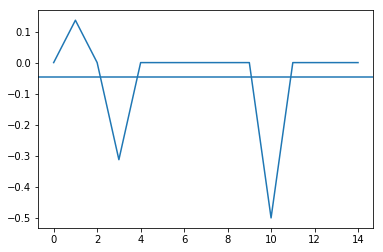

In [127]:
plt.plot(df.Polarity)
plt.axhline(df.Polarity.mean())
#Average sentiment is negative due to Chester's recent death.